# Resumo: Problema geral Amostragem

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import norm

### <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

In [2]:
dados = pd.read_excel("dados.xlsx")
dados.head(3)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1603807616
1,11,1,23,2,12,1150,1739789827
2,11,1,35,8,15,880,1760443822


### Construindo o dataset conforme especificado pelo problema

In [4]:
renda_5000 = dados.query('Renda <= 5000').Renda

In [5]:
# Obtendo Desvio padrao 

sigma = renda_5000.std()
sigma

1082.794549030635

In [6]:
# Obtendo media

media = renda_5000.mean()
media

1426.5372144947232

### Calculando o tamanho da amostra

In [10]:
z = norm.ppf(.975)
e = 10
n = (z * (sigma / e)) ** 2
n = int(n.round())
n

45039

### Calculando o intervalo de confiança para a média

In [11]:
intervalo = norm.interval(alpha = 0.95, loc = media, scale = sigma / np.sqrt(n))
intervalo

C:\Users\leand\AppData\Local\Temp\ipykernel_5220\1746044911.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha = 0.95, loc = media, scale = sigma / np.sqrt(n))


(1416.5372195108241, 1436.5372094786223)

### Realizando uma prova gráficam

<Axes: >

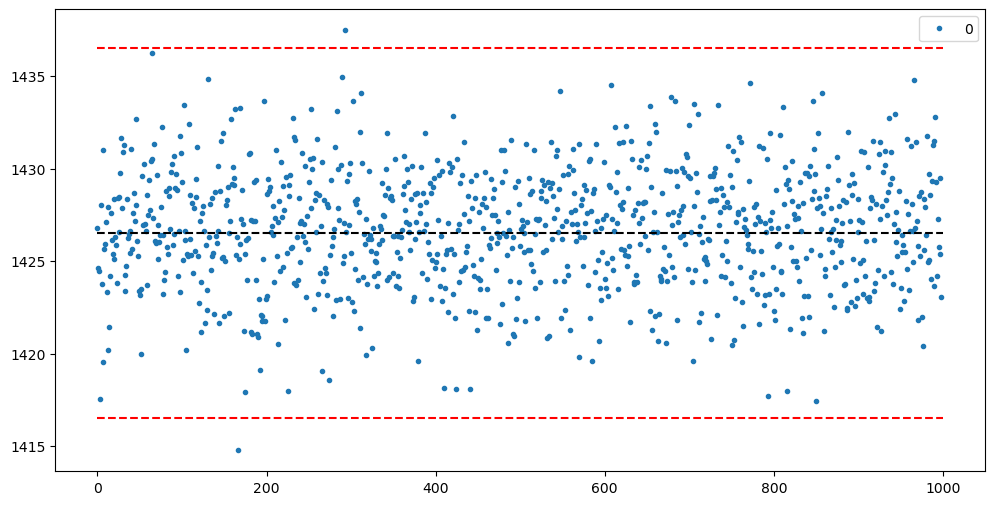

In [13]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax